In [3]:
import numpy as np

import matplotlib as mpl
font = {'family' : 'sans',
        'size'   : 12}

mpl.rc('font', **font)
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator, LogLocator, MaxNLocator
import matplotlib.pyplot as plt

import pandas as pd
from cmcrameri import cm
from scipy.interpolate import PchipInterpolator
from scipy.signal import savgol_filter

In [4]:
from proteus.config import read_config
from proteus.utils.constants import M_earth, R_earth
import utils.load_grid as lg
import utils.feathers as feathers

In [5]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# %matplotlib widget

In [6]:
pgrid_dir = "data/output/l98d_escape27/"
cases = lg.get_cases(pgrid_dir, only_completed=True)
ncases = len(cases)

In [7]:
cnums = [int(s.split("_")[-1]) for s in cases]
print(cnums)
stts = lg.get_statuses(pgrid_dir)
helps, hvars = lg.load_helpfiles(cases)

confs = []
for f in cases:
    confs.append( read_config(f+"/init_coupler.toml") )

transit, eclipse = lg.load_synthobs(cases)

print("Done")

[0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 40, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 129, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 154, 156, 157, 158, 159, 160, 161, 163, 165, 166, 167, 168, 169, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 205, 206, 207, 208, 209, 210, 213, 215, 216, 218, 219, 220, 221, 222, 224, 225, 227, 228, 230, 231, 232, 233, 234, 235, 237, 238, 239, 240, 242, 243, 244, 245, 246, 248, 249, 250, 251, 252, 254, 256, 257, 258, 259, 260, 

Synthobs: 100%|██████████| 246/246 [00:16<00:00, 15.04it/s]

Done


In [8]:
g24_ts = pd.read_csv("data/reference/l9859/gressier24_transitspectroscopy_d.dat", delimiter=' ')
g24_ts_x = g24_ts["central_wavelength(microns)"]
g24_ts_y = g24_ts["transit_depth"] * 1e6
g24_ts_e = g24_ts["transit_depth_error"] * 1e6

g24_ff = pd.read_csv("data/reference/l9859/gressier24_firefly_d.dat", delimiter=' ')
g24_ff_x = g24_ff["central_wavelength(microns)"]
g24_ff_y = g24_ff["transit_depth"] * 1e6
g24_ff_e = g24_ff["transit_depth_error"] * 1e6

g24_fc = pd.read_csv("data/reference/l9859/gressier24_freechem_d.dat", delimiter=' ')
g24_fc_x = g24_fc["central_wavelength(microns)"]
g24_fc_y = g24_fc["best_fit_transit_depth"] * 1e6
g24_fc_e = g24_fc["1_sigma_uncertainty"] * 1e6

z23 = pd.read_csv("data/reference/l9859/zhou23_hst_d.dat", delimiter=' ')
z23_x = z23["wavelength_um"]
z23_y = z23["obs_transit_depth"] * 1e6
z23_e = z23["obs_transit_depth_error"] * 1e6

In [9]:
tra_x = np.append(z23_x, g24_ff_x)
tra_y = np.append(z23_y, g24_ff_y)

mask = np.argsort(tra_x)
tra_x = tra_x[mask]
tra_y = tra_y[mask]

def synth_itp(synth_x, synth_y):
    itp = PchipInterpolator(synth_x, synth_y)
    return itp(tra_x)

def chi2_itp(obs, exp):
    chi2 = 0.0
    for i in range(len(obs)):
        chi2 += (obs[i] - exp[i])**2 / exp[i]
    return chi2

Included cases: 246
struct.mass_tot


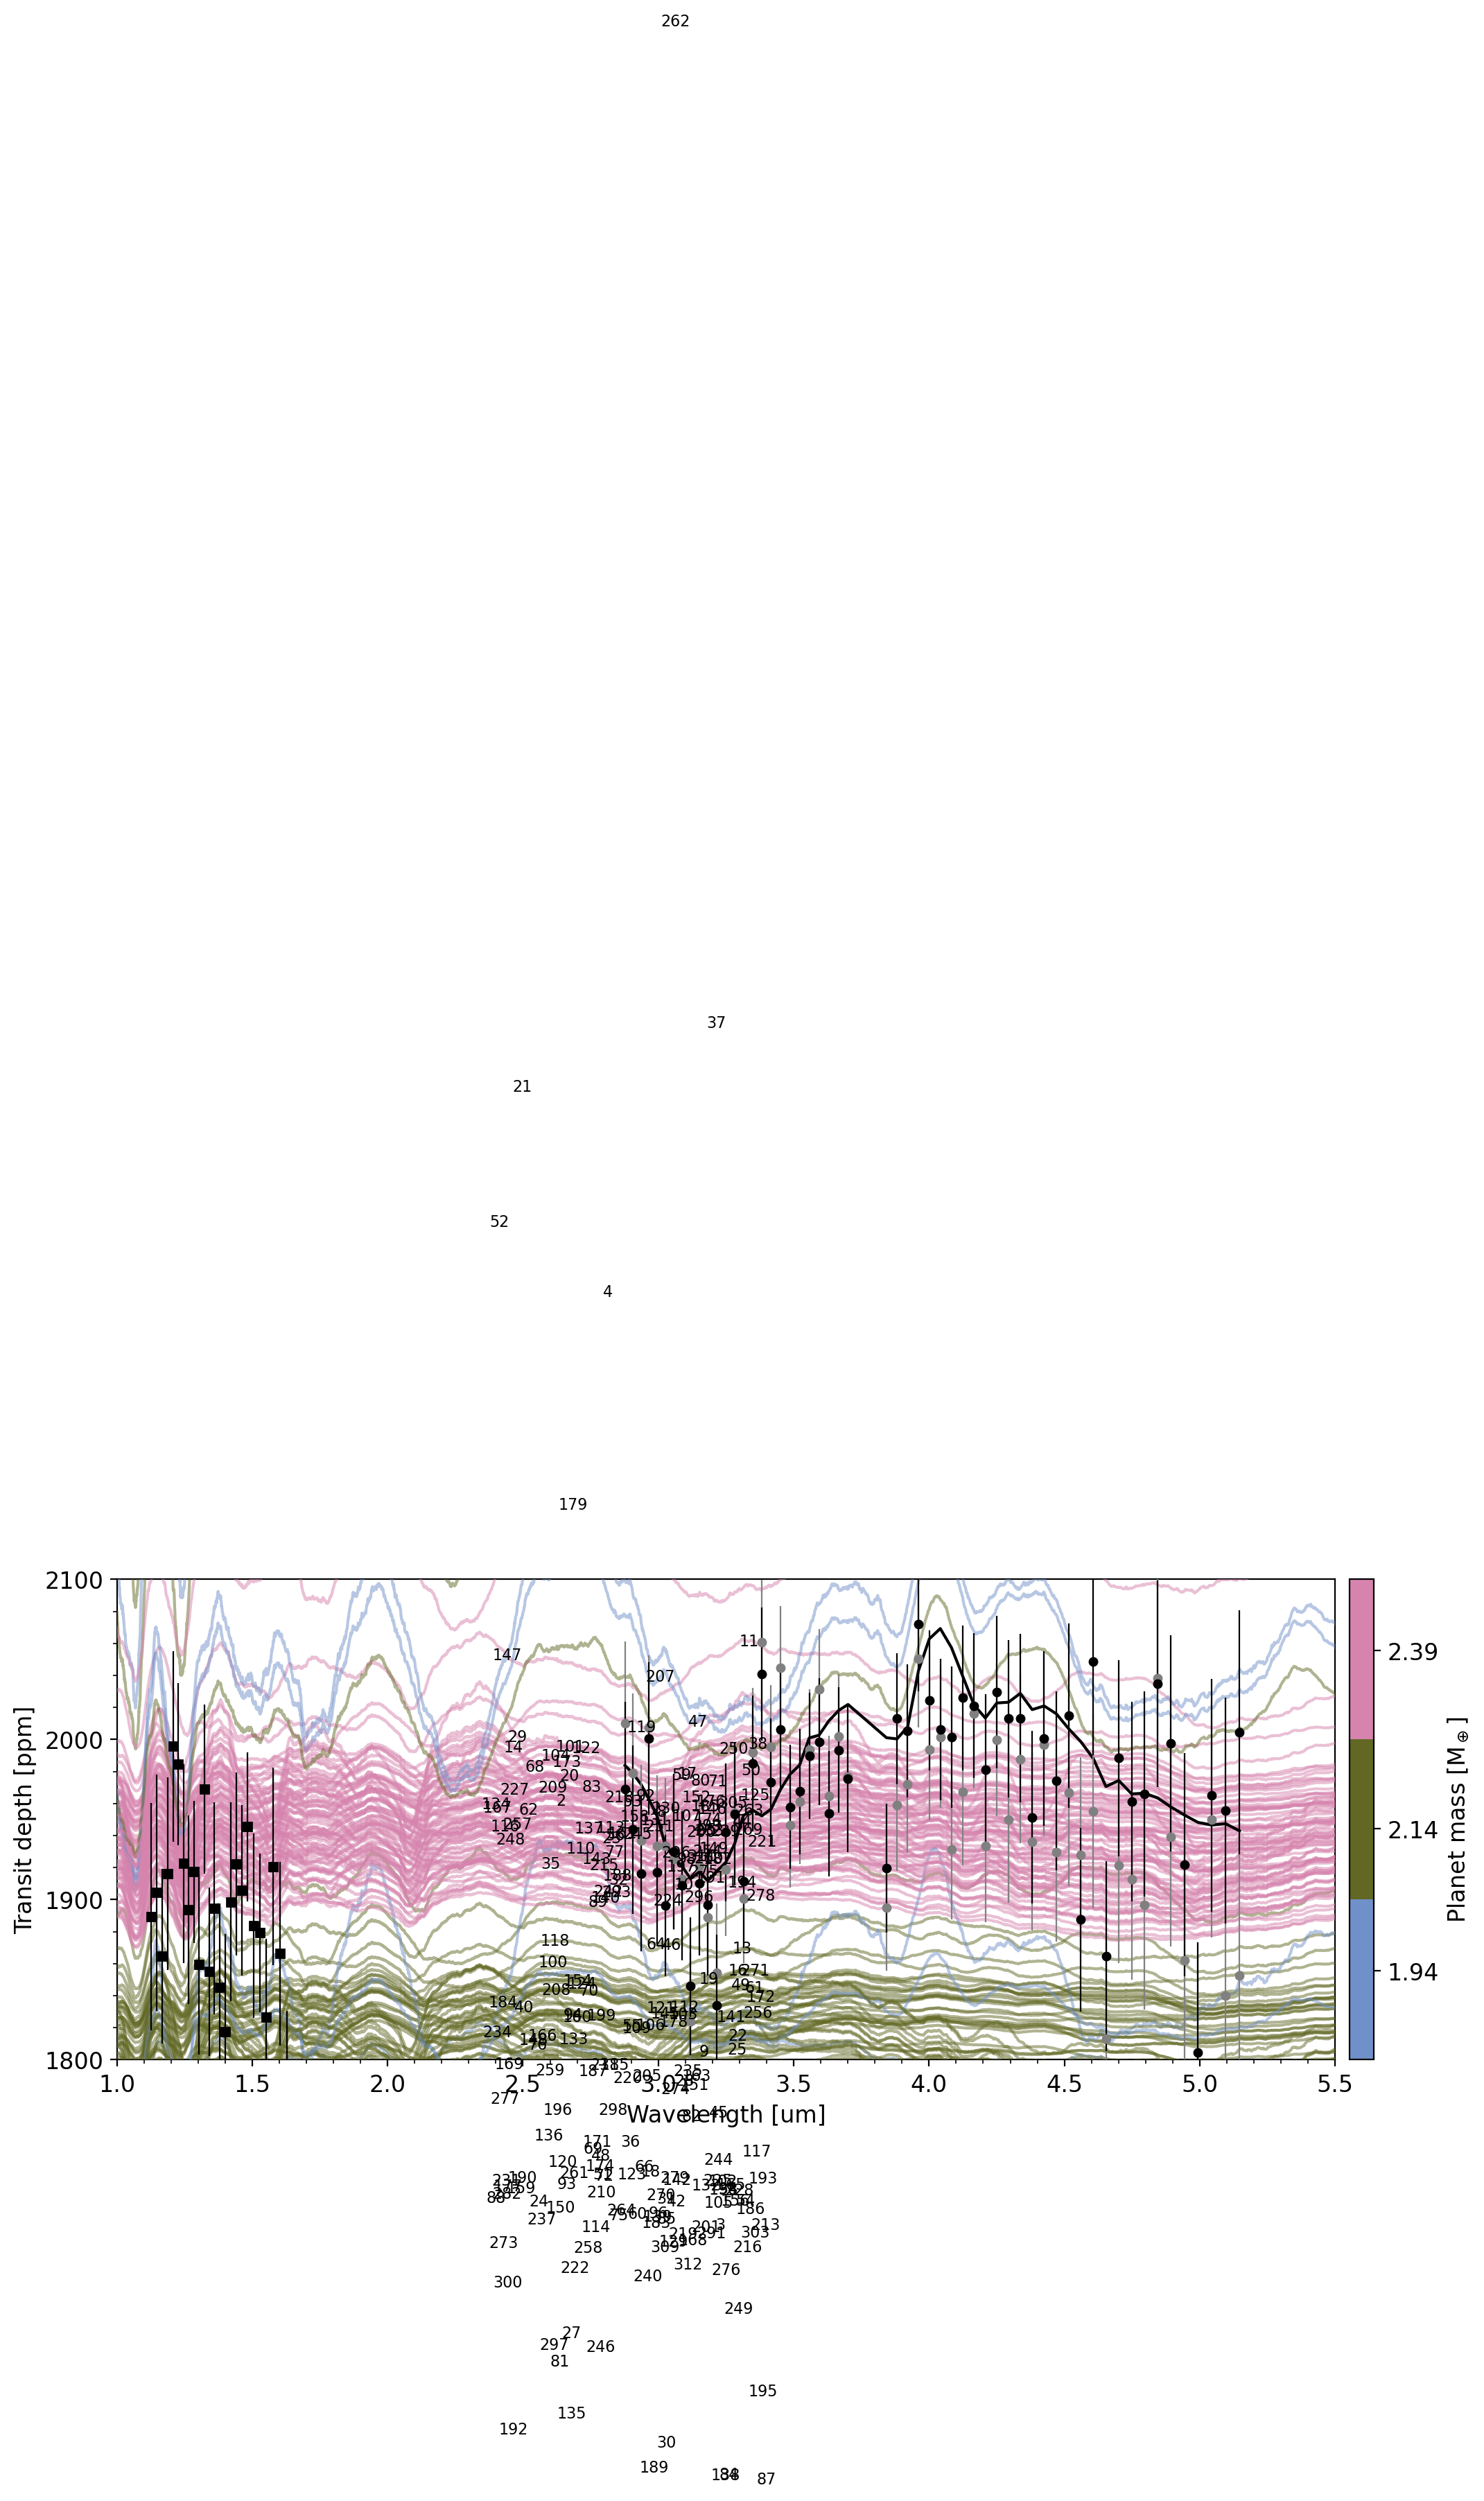

Case	 zval	 Chi2
149	 2.39	 162.447
188	 2.39	 162.843
230	 2.39	 163.184
139	 2.39	 163.683
215	 2.39	 163.809
 38	 2.39	 164.095
227	 2.39	 164.368
 86	 2.39	 164.569
233	 2.39	 164.622
269	 2.39	 164.721
146	 2.39	 166.041
234	 2.39	 166.344
 53	 2.39	 166.475
 20	 2.39	 166.824
 69	 2.39	 166.856
168	 2.39	 169.935
136	 2.39	 171.559
 72	 2.39	 172.561
 88	 2.39	 172.811
 98	 2.39	 172.819
244	 2.39	 174.191
210	 2.39	 174.699
101	 2.39	 175.372
185	 2.39	 175.831
194	 2.39	 176.19
163	 2.39	 179.078
  0	 2.39	 181.221
116	 2.39	 182.693
273	 2.39	 184.014
134	 2.39	 186.526
124	 2.39	 187.139
197	 2.39	 188.525
 50	 2.39	 189.373
208	 2.39	 190.673
 83	 2.39	 193.707
179	 2.39	 197.331
246	 2.39	 200.408
237	 2.39	 200.86
142	 2.39	 202.551
 66	 2.39	 202.865
191	 2.39	 207.199
160	 2.39	 207.475
172	 2.39	 207.665
 17	 2.39	 208.172
 47	 2.39	 208.696
154	 2.39	 208.792
121	 2.39	 209.503
221	 2.39	 209.62
 31	 2.39	 209.71
 94	 2.39	 211.306
106	 2.39	 214.089
182	 2.39	 214.345

In [10]:
figscale = 1.5
fig,ax = plt.subplots(1,1, figsize=(9*figscale,3*figscale))

zkey = "struct.mass_tot"
zlbl = r"Planet mass [M$_\oplus$]"
zfct = 1.0
cmap = plt.get_cmap("princess_parrot")

# zkey = "delivery.elements.H_ppmw"
# zlbl = r"Initial H inventory, H$_\text{ppmw}$"
# zfct = 1.0
# cmap = plt.get_cmap("eastern_rosella_r")

# zkey = "outgas.fO2_shift_IW"
# zlbl = r"Mantle oxygen fugacity, $\Delta$IW"
# zfct = 1.0
# cmap = cm.batlow_r

zscl = "linear"
show_legend = False
show_casenums = True

ctrl = {}
ykey = "None/ppm"
yvar = transit
ylbl = "Transit depth [ppm]"
dsmp = 2
xlim = (1.0, 5.5)

def get_val(conf, help, key):
    if "." in key:
        z = lg.descend_get(conf, key)
    else:
        z = help[key].iloc[-1]
    return z

# work out which cases match control variables
incl = []
for i in range(ncases):
    is_incl = True

    # check controls
    for k in ctrl.keys():
        if not np.isclose(lg.descend_get(confs[i],k),ctrl[k]):
            is_incl = False

    # check status
    # if stts[cnums[i]] != 13:
    #     is_incl = False

    if is_incl:
        incl.append(i)
print("Included cases: %d"%len(incl))

# get range for zkey
print(zkey)
zvals = []
for i in incl:
    zvals.append(get_val(confs[i], helps[i], zkey)*zfct)
zvals = np.unique(zvals)
if zscl == "log":
    norm = mpl.colors.LogNorm(vmin=zvals[0], vmax=zvals[-1])
else:
    norm = mpl.colors.Normalize(vmin=zvals[0], vmax=zvals[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# plot sims
chi2_arr = []
z_arr = []
rho_arr = []
for i in incl:
    cfg = confs[i]

    x = np.array(yvar[i]["Wavelength/um"])
    y = np.array(yvar[i][ykey])
    z = get_val(confs[i], helps[i], zkey)

    if len(x) < 2:
        continue

    x_bin = tra_x
    y_bin = synth_itp(x, y)
    # ax.scatter(x_bin, y_bin, color=sm.to_rgba(z), alpha=0.5, zorder=4, marker='s', edgecolor='none', s=10)

    x_smth = np.array(x)
    y_smth = savgol_filter(y, 200, 5)
    ax.plot(x_smth, y_smth, color=sm.to_rgba(z), alpha=0.5, zorder=3)

    if show_casenums:
        wl_idx = np.argmin(np.abs(x_smth - 2.4 - 1*np.random.rand())) # placement of text
        x = x_smth[wl_idx]
        y = y_smth[wl_idx]
        if cnums[i] == 78:
            fs = 14
            print(cnums[i])
        else:
            fs = 8
        ax.text(x,y,str(cnums[i]), fontsize=fs, color='k', zorder=9, horizontalalignment='center', verticalalignment='center')

    rho_arr.append(helps[i]["rho_obs"].iloc[-1])
    z_arr.append(z)
    chi2_arr.append(chi2_itp(y_bin, tra_y))

# plot literature
ax.errorbar(z23_x, z23_y, yerr=z23_e, label="Zhou+23 (HST)", color="black",
                zorder=4, fmt='s', markersize=4, elinewidth=0.8)
ax.plot(g24_fc_x, g24_fc_y, label="Gressier+24 (Best fit)", color="black", zorder=4,)
ax.errorbar(g24_ts_x, g24_ts_y, yerr=g24_ts_e, label="Gressier+24 (TS pipeline)", color="grey",
                zorder=4, fmt='o',  markersize=4, elinewidth=0.8)
ax.errorbar(g24_ff_x, g24_ff_y, yerr=g24_ff_e, label="Gressier+24 (FF pipeline)", color="black",
                zorder=4, fmt='o',  markersize=4, elinewidth=0.8)


ax.set(xlabel="Wavelength [um]", xlim=xlim)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

ax.set_ylabel(ylbl)
ax.set_ylim(1800, 2100)
ax.yaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(20))

cbpad = 0.01
if len(zvals) > 7:
    fig.colorbar(sm, ax=ax, label=zlbl,  pad=cbpad,)
else:
    fig.colorbar(sm, ax=ax, label=zlbl, values=zvals, ticks=zvals,  pad=cbpad,)
if show_legend:
    ax.legend(loc='lower center', ncols=2)
plt.show()
fig.savefig("output/transit.pdf", bbox_inches='tight')


print("Case\t zval\t Chi2")
for j in np.argsort(chi2_arr):
    print("%3d\t %g\t %g"%(cnums[incl[j]], z_arr[j], chi2_arr[j]))